In [15]:
import pandas as pd
import os
print(os.getcwd())
df = pd.read_csv('../data/cleaned_data.csv')

d:\GitHub\lendingclub-default-risk\notebooks


In [5]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,default_flag,state
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,0,OK
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,0,SD
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,0,WV
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,0,MA
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,1,VA


In [16]:
# Convert column into numerical data
grade_mapping = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6}
df['grade'] = df['grade'].map(grade_mapping)
df['long_term'] = df['term'].apply(lambda x: 1 if x == ' 60 months' else 0)


In [17]:
subgrades = sorted(df['sub_grade'].unique())
subgrade_mapping = {grade: idx for idx, grade in enumerate(subgrades)}
df['sub_grade'] = df['sub_grade'].map(subgrade_mapping)

In [ ]:
emp_length_mapping = {
    '< 1 year': 0, 
    '1 year':  1, 
    '2 years': 2, 
    '3 years': 3, 
    '4 years': 4, 
    '5 years': 5, 
    '6 years': 6,
    '7 years': 7, 
    '8 years': 8, 
    '9 years': 9, 
    '10+ years': 10}
df['emp_length'] = df['emp_length'].map(emp_length_mapping)


,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,default_flag,state,long_term
0,10000.0,36 months,11.44,329.48,1,8,Marketing,10,RENT,117000.0,...,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,0,OK,0
1,8000.0,36 months,11.99,265.68,1,9,Credit analyst,4,MORTGAGE,65000.0,...,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,0,SD,0
2,15600.0,36 months,10.49,506.97,1,7,Statistician,0,RENT,43057.0,...,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,0,WV,0
3,7200.0,36 months,6.49,220.65,0,1,Client Advocate,6,RENT,54000.0,...,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,0,MA,0
4,24375.0,60 months,17.27,609.33,2,14,Destiny Management Inc.,9,MORTGAGE,55000.0,...,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,1,VA,1


In [20]:
ownership_map = {
    'RENT': 0,
    'MORTGAGE': 1,
    'OWN': 2,
    'OTHER': 3,
    'NONE': 3,
    'ANY': 3
}
df['home_ownership'] = df['home_ownership'].map(ownership_map)

In [21]:
verification_map = {
    'Not Verified': 0,
    'Verified': 1,
    'Source Verified': 2
}
df['verification_status'] = df['verification_status'].map(verification_map)

In [ ]:
# purpose is nominal so use one-hot encoding
df = pd.get_dummies(df, columns=['purpose'], drop_first=True)

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'title', 'dti',
       'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'default_flag', 'state', 'long_term',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding'],
      dtype='object')

In [27]:
application_map = {
    'INDIVIDUAL': 0,
    'JOINT': 1,
    'DIRECT_PAY': 2
}
df['application_type'] = df['application_type'].map(application_map)

In [29]:
df.select_dtypes(include='object').columns.tolist()

['term',
 'emp_title',
 'issue_d',
 'loan_status',
 'title',
 'earliest_cr_line',
 'initial_list_status',
 'state']

In [38]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=[
    'default_flag',
    'term',
    'emp_title',
    'issue_d',
    'loan_status',
    'title',
    'earliest_cr_line',
    'initial_list_status',
    'state']
)  # Drop irrelevant/target columns
y = df['default_flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

lr = LogisticRegression(class_weight='balanced',max_iter=1000)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
y_proba = lr.predict_proba(X_test)[:, 1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

[[39884 23745]
 [ 5393 10184]]
              precision    recall  f1-score   support

           0       0.88      0.63      0.73     63629
           1       0.30      0.65      0.41     15577

    accuracy                           0.63     79206
   macro avg       0.59      0.64      0.57     79206
weighted avg       0.77      0.63      0.67     79206

ROC AUC Score: 0.6899403008286344


e:\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [41]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_rf))

[[62792   837]
 [14644   933]]
              precision    recall  f1-score   support

           0       0.81      0.99      0.89     63629
           1       0.53      0.06      0.11     15577

    accuracy                           0.80     79206
   macro avg       0.67      0.52      0.50     79206
weighted avg       0.76      0.80      0.74     79206

ROC AUC Score: 0.7034627226905364


In [45]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    scale_pos_weight=(len(y_train[y_train == 0]) / len(y_train[y_train == 1])),
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
y_proba_xgb = xgb.predict_proba(X_test)[:, 1]
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_xgb))


e:\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:12:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[[42574 21055]
 [ 5478 10099]]
              precision    recall  f1-score   support

           0       0.89      0.67      0.76     63629
           1       0.32      0.65      0.43     15577

    accuracy                           0.67     79206
   macro avg       0.61      0.66      0.60     79206
weighted avg       0.78      0.67      0.70     79206

ROC AUC Score: 0.717034137694017


In [61]:
X_test_numeric = X_test.copy()
X_test_numeric = X_test_numeric.apply(pd.to_numeric, errors='coerce')
X_test_numeric = X_test_numeric.fillna(0)  # Optional: Fill NaNs with 0
X_train_numeric = X_train.copy()
X_train_numeric = X_train_numeric.apply(pd.to_numeric, errors='coerce')
X_train_numeric = X_train_numeric.fillna(0)
X_test_numeric = X_test_numeric.astype(float)
X_train_numeric = X_train_numeric.astype(float)
X_test_numeric.dtypes.unique()

array([dtype('float64')], dtype=object)

 99%|===================| 78801/79206 [03:19<00:01]        

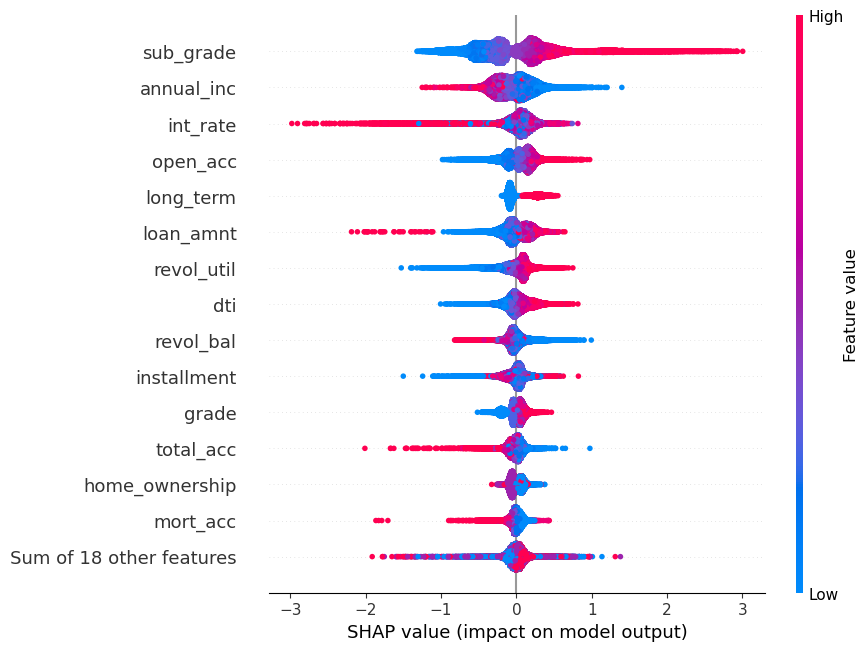

In [62]:
import shap
shap.initjs()
explainer = shap.Explainer(xgb, X_test_numeric)
shap_values = explainer(X_test_numeric)
shap.plots.beeswarm(shap_values, max_display=15)

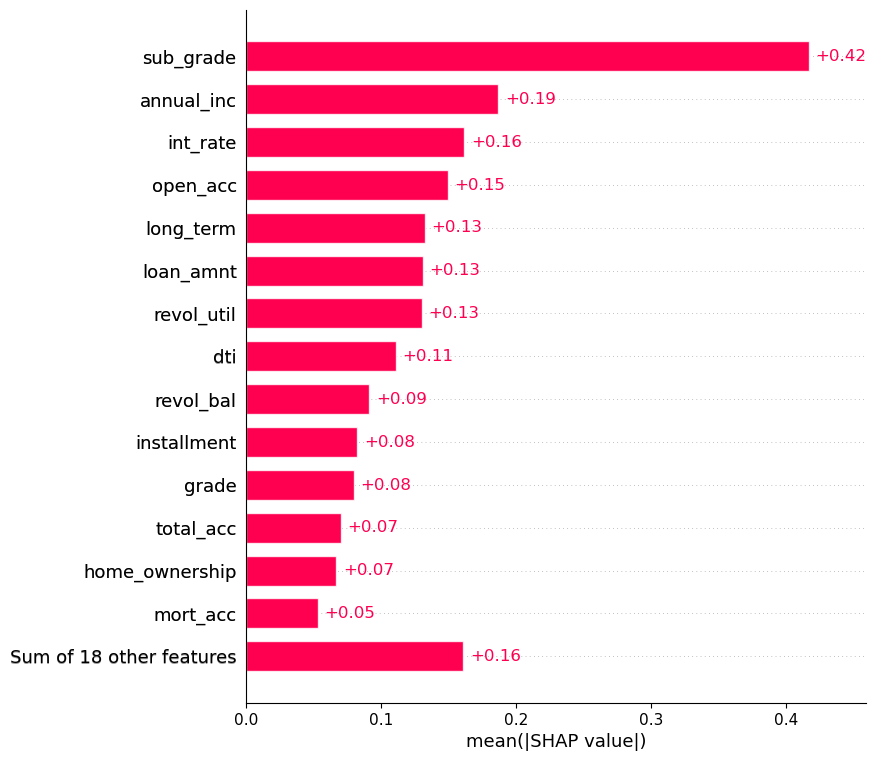

In [69]:
shap.plots.bar(shap_values, max_display=15)

In [64]:

shap.plots.force(shap_values[0])  # Explains the first sample

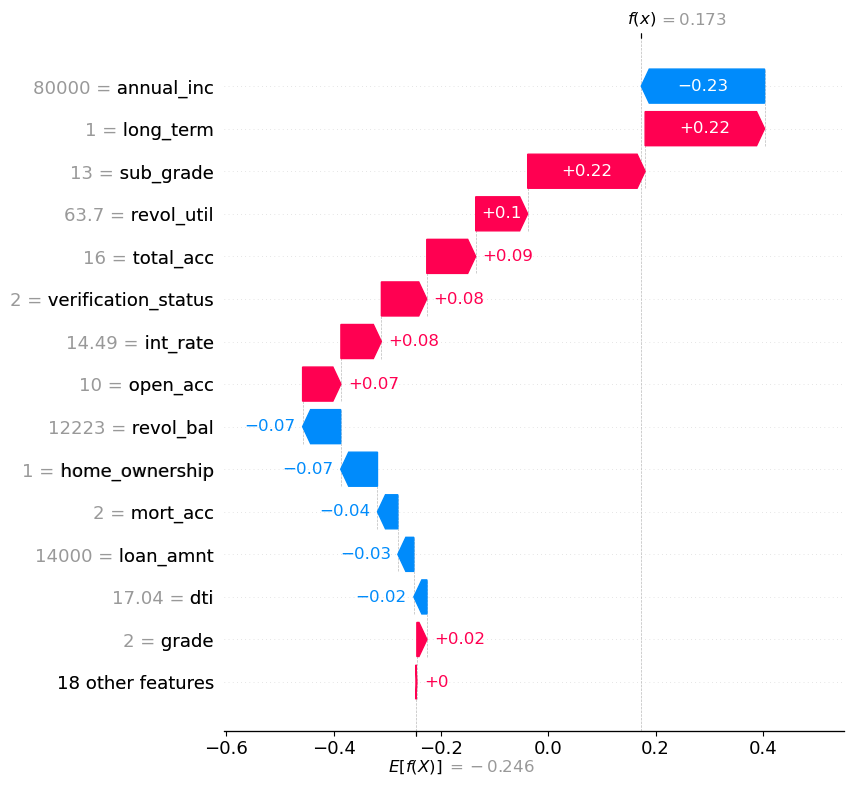

In [70]:
shap.plots.waterfall(shap_values[0], max_display=15)

In [66]:
shap_df = pd.DataFrame(shap_values.values, columns=X_test.columns)
shap_df.to_csv("../visualizations/shap_values_output.csv", index=False)